# **Section C (Algorithm implementation using packages)**

In [ ]:
!pip install tabulate

In [ ]:
import warnings
import kagglehub
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.base import clone
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import log_loss, mean_squared_error, root_mean_squared_error

### Loading Dataset

In [ ]:
path = kagglehub.dataset_download("zalando-research/fashionmnist")

100%|██████████| 68.8M/68.8M [00:00<00:00, 225MB/s]

Extracting files...


In [ ]:
train_data = pd.read_csv(f"{path}/fashion-mnist_train.csv")
test_data  = pd.read_csv(f"{path}/fashion-mnist_test.csv" )

In [ ]:
train_data = train_data.iloc[:8000]
test_data  = test_data.iloc [:2000]

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.505000,0.002625,0.005250,0.033500,0.156250,0.27625,0.437250,0.816125,2.210375,5.599500,...,34.791250,23.391875,16.602000,17.570750,22.662500,18.136000,8.954375,2.941500,0.907375,0.099625
std,2.875023,0.174991,0.162714,0.773436,3.404304,4.82212,6.141582,8.075826,14.252570,23.699384,...,57.945158,48.654295,41.830659,43.643208,51.394489,45.597592,30.610993,17.997106,9.446505,2.826119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,57.000000,10.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,14.000000,10.000000,56.000000,164.000000,217.00000,205.000000,209.000000,218.000000,254.000000,...,248.000000,251.000000,251.000000,254.000000,247.000000,255.000000,243.000000,255.000000,203.000000,170.000000


In [ ]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000
mean,4.530000,0.001000,0.003000,0.023000,0.070500,0.225500,0.301000,0.693500,2.115500,5.227000,...,33.156000,22.354500,15.848000,16.664500,22.433000,17.730000,8.82050,3.133000,0.700000,0.12700
std,2.855727,0.044721,0.070665,0.323301,1.104146,4.424866,3.988528,6.591911,12.819022,22.310835,...,57.661999,48.688665,41.337638,42.268952,51.126025,44.885348,30.27376,18.436791,8.009874,2.99305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51.250000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
max,9.000000,2.000000,2.000000,12.000000,44.000000,168.000000,122.000000,123.000000,175.000000,229.000000,...,240.000000,241.000000,231.000000,236.000000,239.000000,233.000000,227.00000,192.000000,182.000000,107.00000


In [ ]:
class_distribution = train_data['label'].value_counts()
class_distribution

,count
label,
7,833
6,824
9,812
0,811
3,803
5,802
1,800
2,781
4,774


# **Part 1: Normalization and Visualization of Sample Images**

In [ ]:
X_train = train_data.drop(columns='label').values / 255.0
y_train = train_data['label'].values

In [ ]:
X_test = test_data.drop(columns='label').values / 255.0
y_test = test_data['label'].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7200, 784), (800, 784), (7200,), (800,))

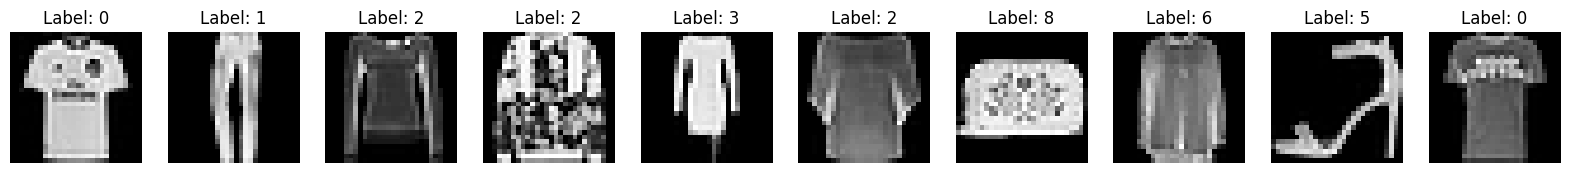

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_test[i]}")
    ax.axis('off')

plt.show()

In [ ]:
def display_curves(title, train_loss, val_loss):

    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss  , label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
results = {}

# **Part 2: Training model and Calculating Training and Validation Loss**

In [ ]:
def train(model, X_train, y_train, X_val, y_val, task="classifier", max_iter=100):

    training_loss = []
    validation_loss = []

    for i in range(max_iter):
      for j in range(0, len(X_train), 128):
        if task == "classifier":
          model.partial_fit(X_train[j : j + 128], y_train[j : j + 128], classes=np.unique(y_train))

        else:
          model.partial_fit(X_train[j : j + 128], X_train[j : j + 128])

      if task == "classifier":
        training_loss.append(model.loss_)
        validation_loss.append(log_loss(y_val, model.predict_proba(X_val)))

      else:
        training_loss.append(model.loss_)
        validation_loss.append(mean_squared_error(X_val, model.predict(X_val)))

      print(f"Epoch {i + 1}: Training Loss = {training_loss[-1]:.4f}, Validation Loss = {validation_loss[-1]:.4f}\n")

    return training_loss, validation_loss

### Logistic Activation

Epoch 1: Training Loss = 2.3784, Validation Loss = 2.3404

Epoch 2: Training Loss = 2.3664, Validation Loss = 2.3334

Epoch 3: Training Loss = 2.3558, Validation Loss = 2.3272

Epoch 4: Training Loss = 2.3465, Validation Loss = 2.3217

Epoch 5: Training Loss = 2.3382, Validation Loss = 2.3167

Epoch 6: Training Loss = 2.3307, Validation Loss = 2.3121

Epoch 7: Training Loss = 2.3240, Validation Loss = 2.3078

Epoch 8: Training Loss = 2.3179, Validation Loss = 2.3037

Epoch 9: Training Loss = 2.3123, Validation Loss = 2.2998

Epoch 10: Training Loss = 2.3070, Validation Loss = 2.2958

Epoch 11: Training Loss = 2.3019, Validation Loss = 2.2919

Epoch 12: Training Loss = 2.2970, Validation Loss = 2.2879

Epoch 13: Training Loss = 2.2922, Validation Loss = 2.2838

Epoch 14: Training Loss = 2.2875, Validation Loss = 2.2795

Epoch 15: Training Loss = 2.2826, Validation Loss = 2.2751

Epoch 16: Training Loss = 2.2777, Validation Loss = 2.2704

Epoch 17: Training Loss = 2.2727, Validation Loss

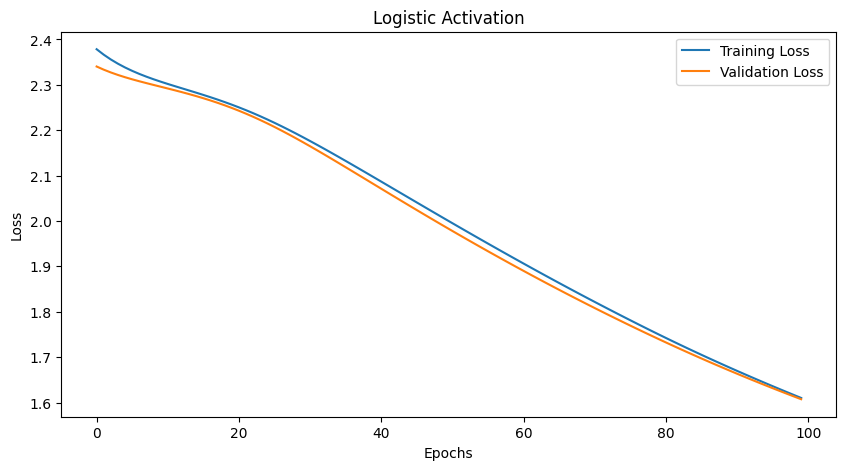

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1, solver='adam', batch_size=128, learning_rate_init=2e-5, activation="logistic", warm_start=True)

training_loss, validation_loss = train(mlp, X_train, y_train, X_val, y_val)

results["logistic"] = mlp.score(X_test, y_test)

print(f"\n\033[1;34mAccuracy when using 'logistic' activation: \033[1;92m{mlp.score(X_test, y_test):.4f}\033[0m\n\n")
display_curves("Logistic Activation", training_loss, validation_loss)

### Tanh Activation

Epoch 1: Training Loss = 2.1632, Validation Loss = 2.1766

Epoch 2: Training Loss = 1.8952, Validation Loss = 1.9161

Epoch 3: Training Loss = 1.6888, Validation Loss = 1.7069

Epoch 4: Training Loss = 1.5392, Validation Loss = 1.5435

Epoch 5: Training Loss = 1.4340, Validation Loss = 1.4174

Epoch 6: Training Loss = 1.3577, Validation Loss = 1.3184

Epoch 7: Training Loss = 1.2988, Validation Loss = 1.2391

Epoch 8: Training Loss = 1.2513, Validation Loss = 1.1744

Epoch 9: Training Loss = 1.2122, Validation Loss = 1.1207

Epoch 10: Training Loss = 1.1793, Validation Loss = 1.0750

Epoch 11: Training Loss = 1.1511, Validation Loss = 1.0356

Epoch 12: Training Loss = 1.1267, Validation Loss = 1.0009

Epoch 13: Training Loss = 1.1052, Validation Loss = 0.9701

Epoch 14: Training Loss = 1.0861, Validation Loss = 0.9425

Epoch 15: Training Loss = 1.0688, Validation Loss = 0.9175

Epoch 16: Training Loss = 1.0531, Validation Loss = 0.8947

Epoch 17: Training Loss = 1.0387, Validation Loss

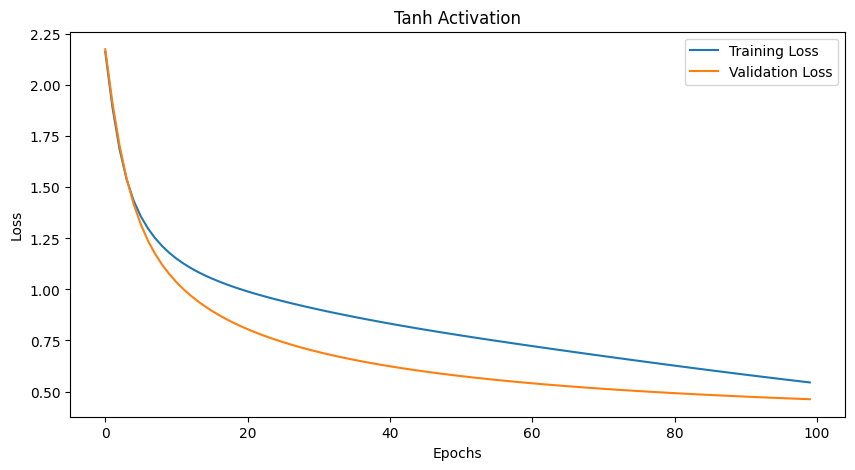

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1, solver='adam', batch_size=128, learning_rate_init=2e-5, activation="tanh", warm_start=True)

training_loss, validation_loss = train(mlp, X_train, y_train, X_val, y_val)

results["tanh"] = mlp.score(X_test, y_test)

print(f"\n\033[1;34mAccuracy when using 'tanh' activation: \033[1;92m{mlp.score(X_test, y_test):.4f}\033[0m\n\n")
display_curves("Tanh Activation", training_loss, validation_loss)

### ReLU Activation

Epoch 1: Training Loss = 2.2571, Validation Loss = 2.1919

Epoch 2: Training Loss = 2.1240, Validation Loss = 2.0493

Epoch 3: Training Loss = 1.9835, Validation Loss = 1.9078

Epoch 4: Training Loss = 1.8406, Validation Loss = 1.7714

Epoch 5: Training Loss = 1.7066, Validation Loss = 1.6441

Epoch 6: Training Loss = 1.5828, Validation Loss = 1.5251

Epoch 7: Training Loss = 1.4763, Validation Loss = 1.4167

Epoch 8: Training Loss = 1.3813, Validation Loss = 1.3209

Epoch 9: Training Loss = 1.2971, Validation Loss = 1.2357

Epoch 10: Training Loss = 1.2313, Validation Loss = 1.1598

Epoch 11: Training Loss = 1.1786, Validation Loss = 1.0930

Epoch 12: Training Loss = 1.1348, Validation Loss = 1.0353

Epoch 13: Training Loss = 1.1026, Validation Loss = 0.9849

Epoch 14: Training Loss = 1.0722, Validation Loss = 0.9409

Epoch 15: Training Loss = 1.0435, Validation Loss = 0.9029

Epoch 16: Training Loss = 1.0186, Validation Loss = 0.8686

Epoch 17: Training Loss = 0.9974, Validation Loss

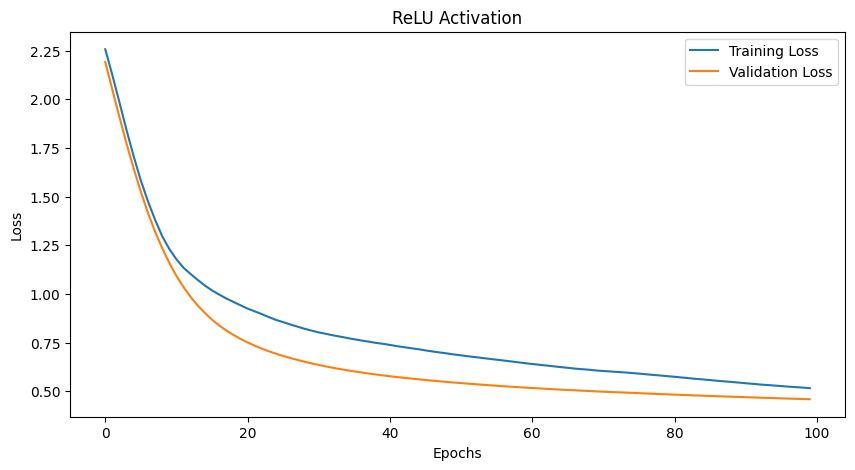

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1, solver='adam', batch_size=128, learning_rate_init=2e-5, activation="relu", warm_start=True)

training_loss, validation_loss = train(mlp, X_train, y_train, X_val, y_val)

results["relu"] = mlp.score(X_test, y_test)

print(f"\n\033[1;34mAccuracy when using 'relu' activation: \033[1;92m{mlp.score(X_test, y_test):.4f}\033[0m\n\n")
display_curves("ReLU Activation", training_loss, validation_loss)

### Identity Activation

Epoch 1: Training Loss = 2.1999, Validation Loss = 2.1166

Epoch 2: Training Loss = 1.8724, Validation Loss = 1.8003

Epoch 3: Training Loss = 1.6271, Validation Loss = 1.5577

Epoch 4: Training Loss = 1.4488, Validation Loss = 1.3749

Epoch 5: Training Loss = 1.3218, Validation Loss = 1.2386

Epoch 6: Training Loss = 1.2305, Validation Loss = 1.1359

Epoch 7: Training Loss = 1.1628, Validation Loss = 1.0570

Epoch 8: Training Loss = 1.1110, Validation Loss = 0.9948

Epoch 9: Training Loss = 1.0700, Validation Loss = 0.9445

Epoch 10: Training Loss = 1.0365, Validation Loss = 0.9029

Epoch 11: Training Loss = 1.0084, Validation Loss = 0.8679

Epoch 12: Training Loss = 0.9844, Validation Loss = 0.8380

Epoch 13: Training Loss = 0.9636, Validation Loss = 0.8120

Epoch 14: Training Loss = 0.9451, Validation Loss = 0.7892

Epoch 15: Training Loss = 0.9286, Validation Loss = 0.7691

Epoch 16: Training Loss = 0.9137, Validation Loss = 0.7510

Epoch 17: Training Loss = 0.9001, Validation Loss

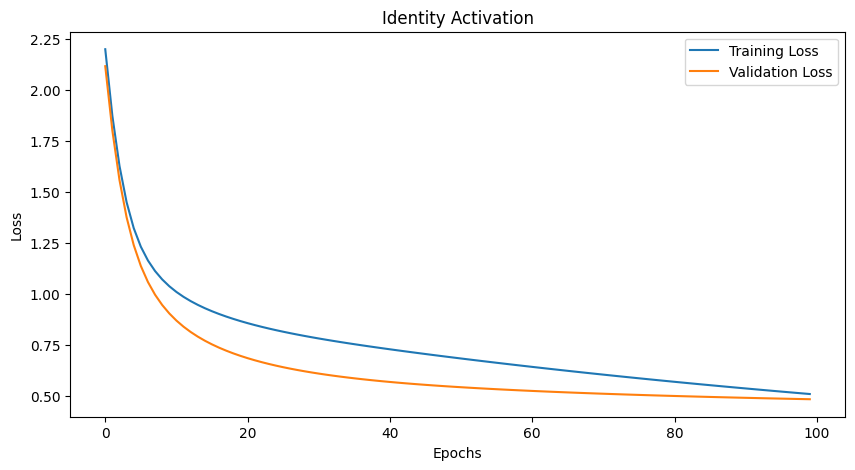

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1, solver='adam', batch_size=128, learning_rate_init=2e-5, activation="identity", warm_start=True)

training_loss, validation_loss = train(mlp, X_train, y_train, X_val, y_val)

results["identity"] = mlp.score(X_test, y_test)

print(f"\n\033[1;34mAccuracy when using 'identity' activation: \033[1;92m{mlp.score(X_test, y_test):.4f}\033[0m\n\n")
display_curves("Identity Activation", training_loss, validation_loss)

In [ ]:
accuracy_table = [["Logistic", results["logistic"]], ["Tanh", results["tanh"]], ["ReLU", results["relu"]], ["Identity", results["identity"]]]
print(tabulate(accuracy_table, headers=["Activation Function", "Test Accuracy"], tablefmt="grid"))

+-----------------------+-----------------+
| Activation Function   |   Test Accuracy |
+=======================+=================+
| Logistic              |          0.533  |
+-----------------------+-----------------+
| Tanh                  |          0.8375 |
+-----------------------+-----------------+
| ReLU                  |          0.835  |
+-----------------------+-----------------+
| Identity              |          0.831  |
+-----------------------+-----------------+


**Observations**:- Some major observations are below:-


*   Logistic activation has poor performance (53.3%) due to vanishing   gradients, which hinders learning of complex patterns.
*   Other activation functions mitigate vanishing gradients—Tanh scales to (-1,1), ReLU introduces sparsity, and Identity allows linear propagation, leading to better performance around 83%.
*   Random Variability in weight initialization causes slight differences in convergence paths, affecting accuracy.
*   I observed on each run Tanh, ReLU, or Identity to perform best depending on the random factors such as random weights, convergence path and different local minima etc.



### Finding Best Activation function based on Accuracy

In [ ]:
best_activation = max(results, key=results.get)
print(f"\n\033[1;34mBest Activation Function: \033[1;92m{best_activation}\033[0m\n")


Best Activation Function: tanh



# **Part 3: Grid Search CV using Best Activation Function**

In [ ]:
param_grid = {
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.1, 0.0001, 2e-3, 2e-4, 2e-5],
    'batch_size': [64, 128, 256]
}

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, activation=best_activation, early_stopping=True)

In [ ]:
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='tanh', batch_size=64,
                                     hidden_layer_sizes=(128, 64, 32),
                                     learning_rate_init=0.002, max_iter=1,
                                     warm_start=True),
             n_jobs=-1,
             param_grid={'batch_size': [64, 128, 256],
                         'learning_rate_init': [0.1, 0.0001, 0.002, 0.0002,
                                                2e-05],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"\n\033[1;34mBest Hyperparameters: \033[1;92m{grid_search.best_params_}\033[0m\n")


Best Hyperparameters: {'batch_size': 128, 'learning_rate_init': 0.002, 'solver': 'adam'}



In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1, activation=best_activation,
                         solver=grid_search.best_params_['solver'],
                         learning_rate_init=grid_search.best_params_['learning_rate_init'],
                         batch_size=grid_search.best_params_['batch_size'], warm_start=True)

training_loss, validation_loss = train(mlp, X_train, y_train, X_val, y_val)

Epoch 1: Training Loss = 0.8184, Validation Loss = 0.5784

Epoch 2: Training Loss = 0.6012, Validation Loss = 0.5200

Epoch 3: Training Loss = 0.5280, Validation Loss = 0.4737

Epoch 4: Training Loss = 0.4830, Validation Loss = 0.4465

Epoch 5: Training Loss = 0.4203, Validation Loss = 0.4364

Epoch 6: Training Loss = 0.3972, Validation Loss = 0.4303

Epoch 7: Training Loss = 0.3932, Validation Loss = 0.4489

Epoch 8: Training Loss = 0.3633, Validation Loss = 0.4338

Epoch 9: Training Loss = 0.3043, Validation Loss = 0.4231

Epoch 10: Training Loss = 0.2730, Validation Loss = 0.4241

Epoch 11: Training Loss = 0.2582, Validation Loss = 0.4081

Epoch 12: Training Loss = 0.2277, Validation Loss = 0.4215

Epoch 13: Training Loss = 0.2742, Validation Loss = 0.4593

Epoch 14: Training Loss = 0.2732, Validation Loss = 0.4740

Epoch 15: Training Loss = 0.1985, Validation Loss = 0.4501

Epoch 16: Training Loss = 0.1903, Validation Loss = 0.4649

Epoch 17: Training Loss = 0.1233, Validation Loss

In [ ]:
print(f"\n\033[1;34mTest Accuracy after using best params from grid search: \033[1;92m{mlp.score(X_test, y_test):.4f}\033[0m\n")


Test Accuracy after using best params from grid search: 0.8450



# **Part 4: Training MLP Regressor Model for Image Regeneration Task**

In [ ]:
results_regressor = {}

### MLP Regressor with ReLU Activation

Epoch 1: Training Loss = 0.0982, Validation Loss = 0.2007

Epoch 2: Training Loss = 0.0910, Validation Loss = 0.1852

Epoch 3: Training Loss = 0.0777, Validation Loss = 0.1564

Epoch 4: Training Loss = 0.0633, Validation Loss = 0.1256

Epoch 5: Training Loss = 0.0520, Validation Loss = 0.1015

Epoch 6: Training Loss = 0.0444, Validation Loss = 0.0856

Epoch 7: Training Loss = 0.0398, Validation Loss = 0.0759

Epoch 8: Training Loss = 0.0371, Validation Loss = 0.0702

Epoch 9: Training Loss = 0.0355, Validation Loss = 0.0669

Epoch 10: Training Loss = 0.0344, Validation Loss = 0.0648

Epoch 11: Training Loss = 0.0335, Validation Loss = 0.0631

Epoch 12: Training Loss = 0.0326, Validation Loss = 0.0614

Epoch 13: Training Loss = 0.0315, Validation Loss = 0.0595

Epoch 14: Training Loss = 0.0303, Validation Loss = 0.0575

Epoch 15: Training Loss = 0.0291, Validation Loss = 0.0554

Epoch 16: Training Loss = 0.0279, Validation Loss = 0.0534

Epoch 17: Training Loss = 0.0268, Validation Loss

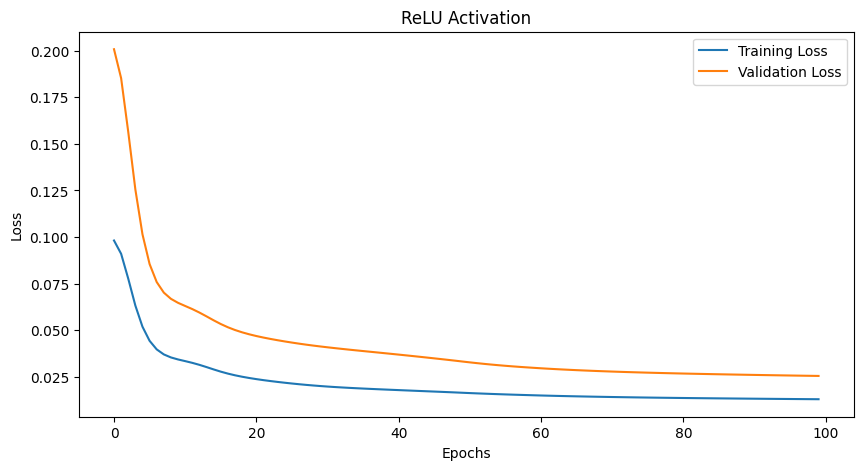

In [ ]:
mlp_relu = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 64, 128), activation='relu', solver='adam', learning_rate_init=2e-5, max_iter=1, warm_start=True)

training_loss, validation_loss = train(mlp_relu, X_train, X_train, X_val, X_val, "regressor")

results_regressor["relu"] = root_mean_squared_error(X_test, mlp_relu.predict(X_test))

print(f"\n\033[1;34mRMSE Score when using 'relu' activation: \033[1;92m{results_regressor['relu']:.4f}\033[0m\n\n")
display_curves("ReLU Activation", training_loss, validation_loss)

### MLP Regressor with Identity Activation

Epoch 1: Training Loss = 0.1015, Validation Loss = 0.2072

Epoch 2: Training Loss = 0.0892, Validation Loss = 0.1817

Epoch 3: Training Loss = 0.0743, Validation Loss = 0.1500

Epoch 4: Training Loss = 0.0590, Validation Loss = 0.1176

Epoch 5: Training Loss = 0.0475, Validation Loss = 0.0933

Epoch 6: Training Loss = 0.0407, Validation Loss = 0.0792

Epoch 7: Training Loss = 0.0371, Validation Loss = 0.0718

Epoch 8: Training Loss = 0.0351, Validation Loss = 0.0676

Epoch 9: Training Loss = 0.0335, Validation Loss = 0.0647

Epoch 10: Training Loss = 0.0321, Validation Loss = 0.0622

Epoch 11: Training Loss = 0.0308, Validation Loss = 0.0599

Epoch 12: Training Loss = 0.0295, Validation Loss = 0.0576

Epoch 13: Training Loss = 0.0284, Validation Loss = 0.0556

Epoch 14: Training Loss = 0.0273, Validation Loss = 0.0538

Epoch 15: Training Loss = 0.0264, Validation Loss = 0.0522

Epoch 16: Training Loss = 0.0257, Validation Loss = 0.0509

Epoch 17: Training Loss = 0.0250, Validation Loss

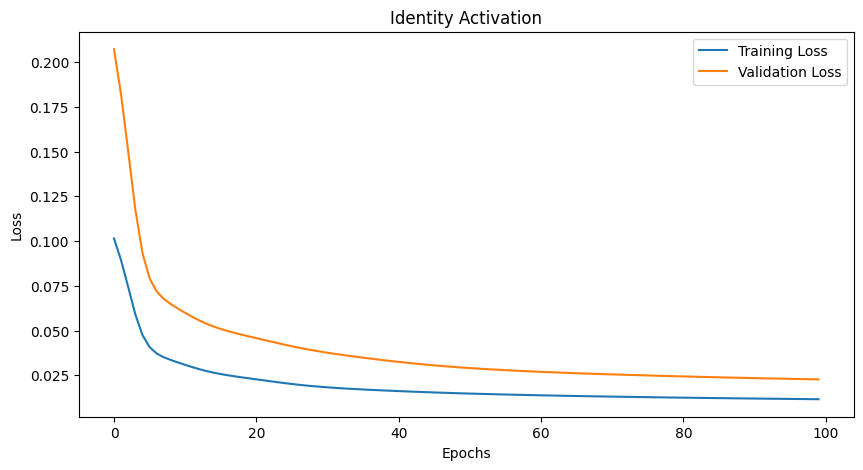

In [ ]:
mlp_identity = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 64, 128), activation='identity', solver='adam', learning_rate_init=2e-5, max_iter=1, warm_start=True)

training_loss, validation_loss = train(mlp_identity, X_train, X_train, X_val, X_val, "regressor")

results_regressor["identity"] = root_mean_squared_error(X_test, mlp_identity.predict(X_test))

print(f"\n\033[1;34mRMSE Score when using 'identity' activation: \033[1;92m{results_regressor['identity']:.4f}\033[0m\n\n")
display_curves("Identity Activation", training_loss, validation_loss)

In [ ]:
regressor_table = [["ReLU", results_regressor["relu"]], ["Identity", results_regressor["identity"]]]
print(tabulate(regressor_table, headers=["Regressor Activation", "RMSE Score"], tablefmt="grid"))

+------------------------+--------------+
| Regressor Activation   |   RMSE Score |
+========================+==============+
| ReLU                   |     0.154098 |
+------------------------+--------------+
| Identity               |     0.145426 |
+------------------------+--------------+


### Visualizing Regenerated Images

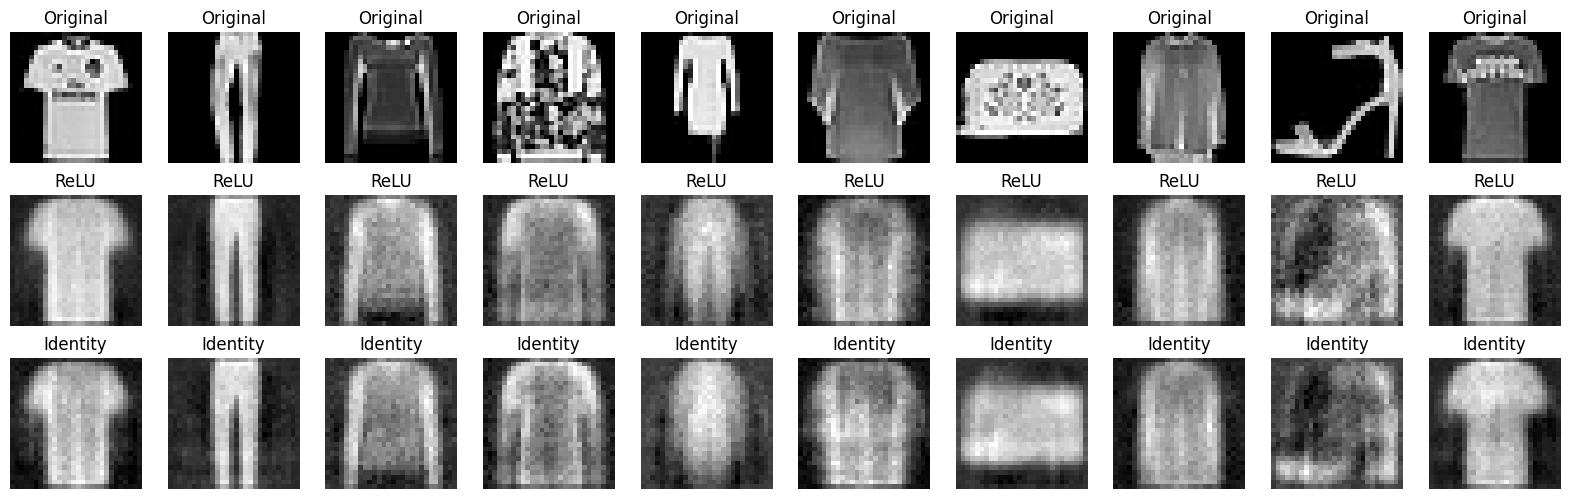

In [ ]:
fig, axes = plt.subplots(3, 10, figsize=(20, 6))

for i in range(10):
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    axes[1, i].imshow(mlp_relu.predict([X_test[i]]).reshape(28, 28), cmap='gray')
    axes[1, i].set_title("ReLU")
    axes[1, i].axis('off')

    axes[2, i].imshow(mlp_identity.predict([X_test[i]]).reshape(28, 28), cmap='gray')
    axes[2, i].set_title("Identity")
    axes[2, i].axis('off')

plt.show()

**Observations**:- Some major observations are below:-


*   I observed that model which uses ReLU activation fucntion produces clearer and sharper regenerated images compared to the Identity activation fucntion because ReLU is non-linear activation fucntion and better captures complex patterns.
*   Images generated using Identity activation fucntion are slightly blurred which directly shows that Identity activation fucntion is not good in capturing complex details.
*   In Images generated by ReLU activation function the objects outlines are slighly sharper than identity which makes visually easy to recognize the object in image.



In [ ]:
a = 32
results = {}

# **Part 5: Extracting Features and Training Classifiers on Extracted Features**

In [ ]:
def extract_features(model, X, feature_size=32, type="relu"):

    index = model.hidden_layer_sizes.index(feature_size) + 1

    cModel = clone(model)
    cModel.set_params(hidden_layer_sizes=model.hidden_layer_sizes[:index])
    cModel.n_layers_ = index + 1
    cModel.out_activation_ = type
    cModel.coefs_ = model.coefs_[:index]
    cModel.intercepts_ = model.intercepts_[:index]
    cModel.n_outputs_ = model.hidden_layer_sizes[index - 1]

    return cModel.predict(X)

In [ ]:
X_train_relu = extract_features(mlp_relu, X_train)
X_test_relu  = extract_features(mlp_relu, X_test )

In [ ]:
X_train_identity = extract_features(mlp_identity, X_train, type="identity")
X_test_identity  = extract_features(mlp_identity, X_test , type="identity")

### MLP Classifier with ReLU Activation

Epoch 1: Training Loss = 3.5861, Validation Loss = 3.2744

Epoch 2: Training Loss = 3.3751, Validation Loss = 3.1107

Epoch 3: Training Loss = 3.1961, Validation Loss = 2.9722

Epoch 4: Training Loss = 3.0458, Validation Loss = 2.8545

Epoch 5: Training Loss = 2.9176, Validation Loss = 2.7542

Epoch 6: Training Loss = 2.8062, Validation Loss = 2.6673

Epoch 7: Training Loss = 2.7028, Validation Loss = 2.5902

Epoch 8: Training Loss = 2.6091, Validation Loss = 2.5206

Epoch 9: Training Loss = 2.5251, Validation Loss = 2.4575

Epoch 10: Training Loss = 2.4483, Validation Loss = 2.4000

Epoch 11: Training Loss = 2.3782, Validation Loss = 2.3477

Epoch 12: Training Loss = 2.3139, Validation Loss = 2.2996

Epoch 13: Training Loss = 2.2562, Validation Loss = 2.2550

Epoch 14: Training Loss = 2.2023, Validation Loss = 2.2130

Epoch 15: Training Loss = 2.1536, Validation Loss = 2.1737

Epoch 16: Training Loss = 2.1085, Validation Loss = 2.1366

Epoch 17: Training Loss = 2.0673, Validation Loss

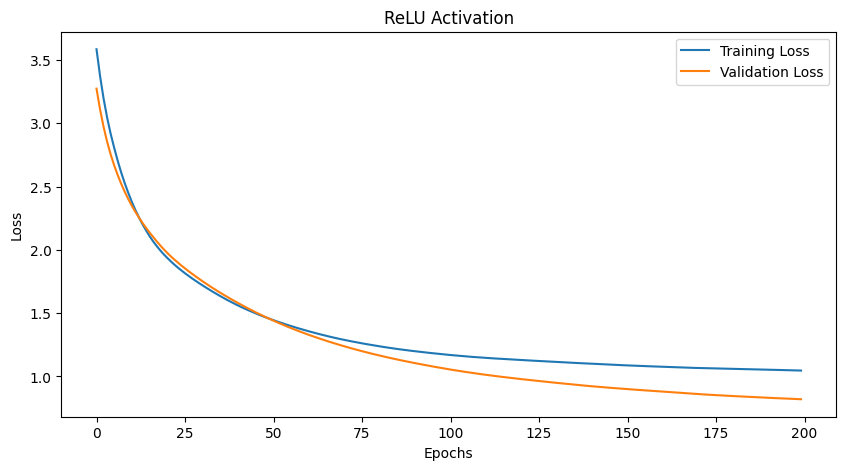

In [ ]:
mlp_relu = MLPClassifier(hidden_layer_sizes=(a, a), max_iter=1, solver='adam', learning_rate_init=2e-5, warm_start=True, activation="relu")

training_loss, validation_loss = train(mlp_relu, X_train_relu, y_train, X_test_relu, y_test, max_iter=200)

results["relu"] = mlp_relu.score(X_test_relu, y_test)

print(f"\n\033[1;34mTest Accuracy when using 'relu' activation: \033[1;92m{mlp_relu.score(X_test_relu, y_test):.4f}\033[0m\n\n")
display_curves("ReLU Activation", training_loss, validation_loss)

### MLP Classifier with Identity Activation

Epoch 1: Training Loss = 4.5554, Validation Loss = 4.1444

Epoch 2: Training Loss = 4.2668, Validation Loss = 3.8395

Epoch 3: Training Loss = 4.0162, Validation Loss = 3.5878

Epoch 4: Training Loss = 3.7945, Validation Loss = 3.3769

Epoch 5: Training Loss = 3.5941, Validation Loss = 3.1961

Epoch 6: Training Loss = 3.4100, Validation Loss = 3.0378

Epoch 7: Training Loss = 3.2393, Validation Loss = 2.8973

Epoch 8: Training Loss = 3.0806, Validation Loss = 2.7714

Epoch 9: Training Loss = 2.9334, Validation Loss = 2.6577

Epoch 10: Training Loss = 2.7978, Validation Loss = 2.5551

Epoch 11: Training Loss = 2.6742, Validation Loss = 2.4623

Epoch 12: Training Loss = 2.5628, Validation Loss = 2.3785

Epoch 13: Training Loss = 2.4633, Validation Loss = 2.3026

Epoch 14: Training Loss = 2.3749, Validation Loss = 2.2333

Epoch 15: Training Loss = 2.2960, Validation Loss = 2.1697

Epoch 16: Training Loss = 2.2251, Validation Loss = 2.1106

Epoch 17: Training Loss = 2.1604, Validation Loss

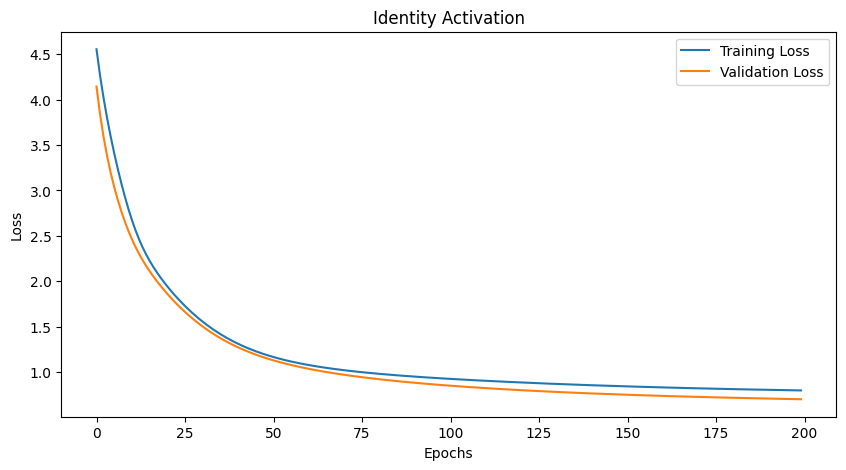

In [ ]:
mlp_identity = MLPClassifier(hidden_layer_sizes=(a, a), max_iter=1, solver='adam', learning_rate_init=2e-5, warm_start=True, activation="identity")

training_loss, validation_loss = train(mlp_identity, X_train_identity, y_train, X_test_identity, y_test, max_iter=200)

results["identity"] = mlp_identity.score(X_test_identity, y_test)

print(f"\n\n\033[1;34mTest Accuracy when using 'identity' activation: \033[1;92m{mlp_identity.score(X_test_identity, y_test):.4f}\033[0m\n\n")
display_curves("Identity Activation", training_loss, validation_loss)

In [ ]:
accuracy_table = [["ReLU", results["relu"]], ["Identity", results["identity"]]]
print(tabulate(accuracy_table, headers=["Activation Function", "Test Accuracy"], tablefmt="grid"))

+-----------------------+-----------------+
| Activation Function   |   Test Accuracy |
+=======================+=================+
| ReLU                  |           0.692 |
+-----------------------+-----------------+
| Identity              |           0.741 |
+-----------------------+-----------------+


**Observations**:- Contrast of Part 5 with Part 2 is below:-


*   In Part 2 classifier model with ReLU and Identity activation gives 83.5% and 83.1% accuracy respectively, while in Part 5 classifier model with ReLU and Identity activation gives 69.2% and 74.1% accuracy respectively.

**Possible Reason:**


*   Extracted feature vectors keep the important pattern and make them ideal for quickly training smaller classifiers.
*   Feature vectors reduce data complexity but keep essential details, helping smaller classifiers in achieving decent accuracy.
*   Features from deeper layers capture detailed patterns and boost image classification accuracy.

